# Clasificacion de flores con KNN

## Objetivo
Entrenar un modelo de clasificacion usando **K-Nearest Neighbors** para predecir la especie de flor.

**Practicas**: clasificación básica, métricas, visualización de fronteras de decisión.
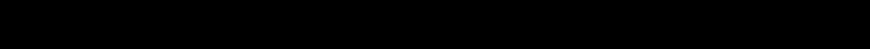

In [61]:
# Importo librerias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

## Clasificacion Basica

In [8]:
# Cargo el dataset
ds = load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
# Declaro variables para que reciban la data
X = ds.data
y = ds.target

In [36]:
# Divido variables en entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y , test_size=0.2, random_state=42)

In [37]:
# Inicializo el KNN Classifier con k=3
k=3
knn = KNeighborsClassifier(n_neighbors=k)

In [38]:
# Entreno el modelo
knn.fit(X_entrena, y_entrena)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
# Realizo las predicciones con el set de pruebas
y_predictions = knn.predict(X_prueba)

## Evaluaciones con metricas

In [40]:
# Ahora evalúo el modelo
accuracy = accuracy_score(y_prueba, y_predictions)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_prueba, y_predictions))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Dado que la presición del modelo salió al 100%, podria parecer ideal, pero requiero confirmarlo.

Realizaré nuevamente la ejecucion con `shuffle = TRUE` para que mezcle la data antes de dividirla.


In [41]:
# Divido variables en entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y , test_size=0.2, random_state=42, shuffle=True)

In [42]:
# Inicializo el KNN Classifier con k=3
k=3
knn = KNeighborsClassifier(n_neighbors=k)

In [43]:
# Entreno el modelo
knn.fit(X_entrena, y_entrena)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
# Realizo las predicciones con el set de pruebas
y_predictions = knn.predict(X_prueba)

In [45]:
# Ahora evalúo el modelo
accuracy = accuracy_score(y_prueba, y_predictions)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_prueba, y_predictions))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Nuévamente salió la precisión al 100%, por lo que realizaré más validaciones para asegurar que el modelo no este sobre ajustado.

In [46]:
# Asigno un conjunto de pruebas más amplio
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y , test_size=0.5, random_state=42, shuffle=True)


In [47]:
# Inicializo el KNN Classifier con k=3
k=3
knn = KNeighborsClassifier(n_neighbors=k)

In [48]:
# Entreno el modelo
knn.fit(X_entrena, y_entrena)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
# Realizo las predicciones con el set de pruebas
y_predictions = knn.predict(X_prueba)

In [50]:
# Ahora evalúo el modelo
accuracy = accuracy_score(y_prueba, y_predictions)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_prueba, y_predictions))

Accuracy: 97.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      1.00      0.96        23
           2       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



Tras usar un conjunto de pruebas más amplio (50%) y con `shuffle = TRUE`:
* El modelo generaliza bien
    * No está memorizando los datos de entrenamiento
    * Tiene capacidad de clasificar correctamente nuevos ejemplos, incluso con menos vecinos cercanos
* El problema es bien definido y separable
    * El dataset tiene clases que se distinguen claramente en el espacio de caracteristicas.
    * Entonces KNN es un buen modelo base para este tipo de datos

Aunque realizaré una validacion cruzada para confirmar lo anterior

In [56]:
# Evalúo el modelo en multiples particiones del dataset
puntuaciones = cross_val_score(knn, X, y, cv=5)
print(f'Puntuaciones: {puntuaciones*100}')
print(f'Puntuacion media: {puntuaciones.mean()*100:.2f}%')

Puntuaciones: [ 96.66666667  96.66666667  93.33333333  96.66666667 100.        ]
Puntuacion media: 96.67%


Con los resultados de la validacion cruzada, veo que:
   * Las puntuaciones fold están todas por encima del 93%, lo que indica que el modelo generaliza bien en diferentes particiones del dataset.
   * No hay variaciones extremas entre los folds, lo que sugiere estabilidad.
No hay sobreajuste evidente
   * Si el modelo estuviera sobreajustado, notaria alguna caida significativa en alguno de los folds.
   * Aquí incluso el fold más bajo (93.33%) sigue siendo alto.

## Visualización de fronteras de decision

Ahora generaré una visualizacion de fronteras de decision para ver como el modelo separa las clases en el espacio de features

In [57]:
# Reduzco la data a 2D
pca = PCA(n_components=2)
X_reducido = pca.fit_transform(X)

In [58]:
# Ahora entreno KNN con los datos reducidos y llevo en mente que k=3 y que ds.target es la variable y
knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_reducido, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


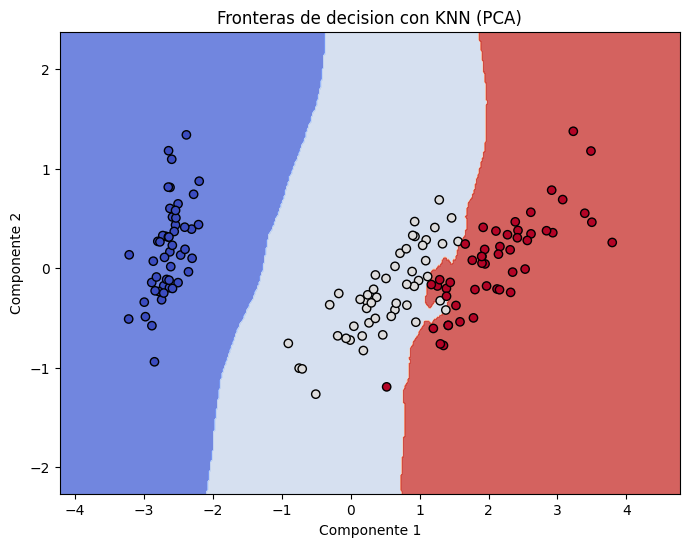

In [64]:
# Entonces grafíco fronteras
h = .02 # paso de la malla
x_min, x_max = X_reducido[:, 0].min() - 1, X_reducido[:, 0].max() + 1
y_min, y_max = X_reducido[:, 1].min() - 1, X_reducido[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y, edgecolors = 'k', cmap = plt.cm.coolwarm)
plt.title('Fronteras de decision con KNN (PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show();

# Caso práctico: Clasificación de especies de flores con KNN
## Objetivo
Entrenar y validar un modelo de clasificación supervisada usando KNN sobre el dataset Iris.

### Pasos realizados:
- Carga y exploración del dataset
- División en entrenamiento y prueba
    - shuffle= False / True
    - conjunto de pruebas al 20% y 50%
- Entrenamiento de modelo KNN con k=3
- Evaluación con accuracy y validación cruzada (cv=5)
- Visualización de fronteras de decisión usando PCA
### Resultados:
- Accuracy promedio: 96.67%
- Fronteras de decisión bien definidas entre clases
- Modelo estable y generalizable
## Reflexión:
“Aunque el modelo inicialmente mostró una precisión perfecta, decidí validar su robustez con técnicas como cross-validation y visualización de fronteras. Esto me permitió confirmar que el modelo no estaba sobreajustado y que las clases eran separables. Este tipo de análisis me parece esencial para evitar decisiones basadas en métricas engañosas.”
